In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hotelreviews.csv')
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


Exploratory Data Analysis (EDA) and Feature Engineering

In [3]:
# Remove missing values (NaN)
df1 = df[pd.notnull(df['Review'])]

In [5]:
df1.shape

(20491, 2)

In [7]:
pd.DataFrame(df1['Rating'].unique())

,0
0,4
1,2
2,3
3,5
4,1


There are 5 different classes or categories (target)

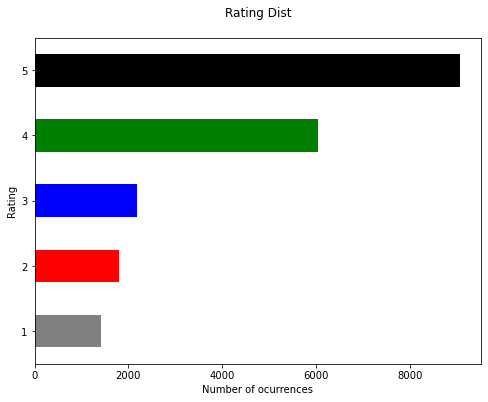

In [10]:
fig = plt.figure(figsize=(8,6))

colors = ['grey','red','blue','green','black']

df1.groupby('Rating').Review.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'Rating Dist\n')

plt.xlabel('Number of ocurrences', fontsize = 10);

Text Preprocessing

The text needs to be transformed to vectors so as the algorithms will be able make predictions. In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight to evaluate how important a word is to a document in a collection of documents.
After removing punctuation and lower casing the words, importance of a word is determined in terms of its frequency.

TfidfVectorizer class can be initialized with the following parameters:

1. min_df: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
2. max_df: remove the words from the vocabulary which have occurred in more than _‘maxdf’ * total number of files in corpus.
3. sublinear_tf: set to True to scale the term frequency in logarithmic scale.
4. stop_words: remove the predefined stop words in 'english'.
5. use_idf: weight factor must use inverse document frequency.
6. ngram_range: (1, 2) to indicate that unigrams and bigrams will be considered.

In [11]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df1.Review).toarray()
labels = df1.Rating

print("Each of the %d reviews is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 20491 reviews is represented by 68512 features (TF-IDF score of unigrams and bigrams)


------

Multi-Classification models
The classification models evaluated are:
Random Forest
Linear Support Vector Machine
Multinomial Naive Bayes
Logistic Regression.

In [12]:
"""
Spliting the data into train and test sets

The original data was divided into features (X) and target (y), which were then splitted into train (75%) and test (25%) sets.
Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).
"""

X = df1['Review'] # Collection of documents
y = df1['Rating'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

Modelling

In [14]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [15]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
                ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.593577,0.004769
LogisticRegression,0.611536,0.009859
MultinomialNB,0.463618,0.004506
RandomForestClassifier,0.441853,0.000157


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [18]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                               labels,
                                                               df1.index, test_size=0.25,
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
type(y_pred)

numpy.ndarray

In [27]:
lst1 = X_test
lst2 = y_test
lst3 = y_pred

df3 = pd.DataFrame(list(zip(lst1, lst2, lst3)),columns =['Review', 'Rating', 'Predicted'])
df3

,Review,Rating,Predicted
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,4
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,5
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,5
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,4
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,4
...,...,...,...
5118,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,5
5119,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,2
5120,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,5
5121,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,5
